## Motif Mapping - bicoid

Using Ciera Martinez's map_motif.py in a generalized jupyter notebook function.  In this notebook, we are creating the files to do Motif mapping of bicoid across 361 of the alignment files. 

In [11]:
# Import definitions & functions from .py file:
from MSE import *

### MSE.py has been debugged; Pipeline now works with JASPAR files.

In [39]:
align_path = '../data/alignments/*.fa' # Multiple alignment files
motif_path = "../data/jaspar_fm/modified/MA0212.1_bcd.jaspar" # 1 motif file
files = glob(align_path)


jaspar_results = pipeline(files[3], motif_path, percentile=95)
jaspar_results[0].to_csv('~/Desktop/occurance_bcd.csv')

In [14]:
view_data(jaspar_results, "filtered").head()

,score,species,raw_position,strand,align_position,motif
21,8.354094,VT29210|0|MEMB002A|+|1954,1454,positive,2839,MA0212.1_bcd.jaspar
25,8.354094,VT29210|0|MEMB002B|+|1951,1455,positive,2839,MA0212.1_bcd.jaspar
23,8.354094,VT29210|0|MEMB002C|+|1932,1432,positive,2839,MA0212.1_bcd.jaspar
14,11.612828,VT29210|0|MEMB002D|-|2326,111,negative,167,MA0212.1_bcd.jaspar
15,8.354094,VT29210|0|MEMB002D|-|2326,114,positive,170,MA0212.1_bcd.jaspar


In [5]:
view_data(jaspar_results, "grouped").head()

,Species with TFBS at Position,Count
0,"(VT10670|1|MEMB002A|-|2087, VT10670|1|MEMB002B...",1
1,"(VT10670|1|MEMB002A|-|2087, VT10670|1|MEMB002C...",1
2,"(VT10670|1|MEMB002F|-|2363,)",2
3,"(VT10670|1|MEMB002D|+|2107,)",2
4,"(VT10670|1|MEMB006C|+|2180,)",1


In [7]:
view_data(jaspar_results, "frequent").head()

,Species with TFBS at Position,Count
2,"(VT10670|1|MEMB002F|-|2363,)",2
3,"(VT10670|1|MEMB002D|+|2107,)",2


In [8]:
view_data(jaspar_results, "most frequent").head()

,Species with TFBS at Position,Count
2,"(VT10670|1|MEMB002F|-|2363,)",2
3,"(VT10670|1|MEMB002D|+|2107,)",2


## Data Processing

Reads in the alligned raw DNA sequences and motifs to be pipelined:

1. Saves a copy of the sequence without the '$-$' included.

2. Casts the undashed version as IUPACUnambiguousDNA().

3. Calculates the thresholds to be used in assigning scores for likihood of the motif appearing.

4. Takes the indicies that have been scored and maps them to the corresponding raw sequence index, taking into consideration if the strand was positive or negative.

5. Returns a df with $\scriptsize{[\textbf{position}, \textbf{score, sequence length}, \textbf{species}, \textbf{raw_position index}, \textbf{strand positioning}, \textbf{aligned position}]}$.


## Data Extraction

Taking the dfs that come from the "calculate_all_TFBS" function we filter out those with a score above the 95th percentile. With the filtered out values we match the species with their respective DNA sequences and then locate and save the given motif within the DNA sequence. Whether the strand is positive or negative is treated individually and the -'s are included in the sequence indexing. This newly extracted information is saved as columns and appended to the df.

The following 3 cells provide a convenient way to access the standard "cutoff" point when using the 4 motifs printed below. cutoff_dict is used in the filter_95_percentile function.

In [4]:
all_motifs

['../data/pwm/cad_FlyReg.fm',
 '../data/pwm/eve_new6.fm',
 '../data/pwm/zelda_.fm',
 '../data/pwm/bcd_FlyReg.fm']

In [5]:
cutoff_dict = {}
cutoff_dict["bcd_FlyReg.fm"] = stand_cutoff(all_motifs, 0)[0]
cutoff_dict["cad_FlyReg.fm"] = stand_cutoff(all_motifs, 1)[0]
cutoff_dict["eve_new6.fm"] = stand_cutoff(all_motifs, 2)[0]
cutoff_dict["zelda_.fm"] = stand_cutoff(all_motifs, 3)[0]

In [9]:
# LOOP THROUGH & APPLY TO ALL THE ALIGNMENTS FOR Zelda
## Count is just to print something out to get an idea of 
## where we are in the loop. 
#count=0
#tables = []
#for i in files[:500]:
#    count = count + 1
#    tables.append(calculate_one_dfs_TFBS(i, [all_motifs[2]]))
#    print(count)

In [18]:
# LOOP THROUGH & APPLY TO ALL THE ALIGNMENTS
filtered_tables = []
for i in tables:
    f = filter_95_percentile(i, "zelda_.fm").drop(['seq_len', 'position'], axis=1)
    filtered_tables.append(f)

## Grouping Sequences by species that share TFBS presence

### Filtered_tables
* filtered_tables is a LIST of TABLES; each table in this list represents ONE alignment file. In every table, 1 row represents a spot on the sequence that we've chosen to label as TFBS, based on our 95% criteria. You can index into filtered_tables to view any one table. For example, alignment 1:

### position_species_tables
(See below for example) position_species_tables is also a LIST of TABLES. Again, each element in the list represents ONE alignment file. Each table tells you:

1. The alignment position
2. A tuple containing all the species that have TFBS's at that position

In [19]:
filtered_tables[6]

,score,species,raw_position,strand,align_position,motif
603,6.678132,VT8450|1|MEMB002A|+|2656,33,positive,65,zelda_.fm
605,6.678132,VT8450|1|MEMB002A|+|2656,72,positive,138,zelda_.fm
608,6.678132,VT8450|1|MEMB002A|+|2656,134,negative,221,zelda_.fm
609,6.678132,VT8450|1|MEMB002A|+|2656,150,positive,237,zelda_.fm
614,6.678132,VT8450|1|MEMB002A|+|2656,184,positive,271,zelda_.fm
615,6.678132,VT8450|1|MEMB002A|+|2656,217,negative,326,zelda_.fm
619,6.678132,VT8450|1|MEMB002A|+|2656,350,negative,527,zelda_.fm
626,6.678132,VT8450|1|MEMB002A|+|2656,577,negative,782,zelda_.fm
628,6.678132,VT8450|1|MEMB002A|+|2656,634,negative,841,zelda_.fm
630,6.678132,VT8450|1|MEMB002A|+|2656,704,positive,919,zelda_.fm


### Splitting the species column

In order to simplify the species grouping we are going to isolate the species name. 

In [20]:
## Loop through all the filtered dataframes to extract informative information
## from sequence ID, makes things cleaner
## ONLY RUN ONCE, IF YOU NEED TO RE_RUN MAKE NEW filtered_tables

for df in filtered_tables:
    df['align_file'] = df['species'].str.split('|').str[0]
    df['function'] = df['species'].str.split('|').str[1]
    df['species'] = df['species'].str.split('|').str[2]

In [21]:
filtered_tables[3].head(10)

,score,species,raw_position,strand,align_position,motif,align_file,function
1748,6.678132,MEMB002A,24,negative,45,zelda_.fm,VT29210,0
1765,6.678132,MEMB002A,337,negative,1218,zelda_.fm,VT29210,0
1767,6.678132,MEMB002A,392,negative,1400,zelda_.fm,VT29210,0
1772,6.678132,MEMB002A,456,negative,1515,zelda_.fm,VT29210,0
1775,6.678132,MEMB002A,495,negative,1568,zelda_.fm,VT29210,0
1776,6.678132,MEMB002A,504,negative,1577,zelda_.fm,VT29210,0
1779,6.678132,MEMB002A,514,positive,1598,zelda_.fm,VT29210,0
1783,6.678132,MEMB002A,552,negative,1637,zelda_.fm,VT29210,0
1787,6.678132,MEMB002A,627,positive,1719,zelda_.fm,VT29210,0
1789,6.678132,MEMB002A,640,positive,1732,zelda_.fm,VT29210,0


In [55]:
## Write out filtered_tables 
pd.concat(filtered_tables).to_csv('~/Desktop/filtered_tables_zelda_.fm.csv')

In [51]:
position_species_tables = []

for f in filtered_tables:
    positions_with_TFBS = list(f["align_position"])
    combos = {} # Dictionary with position index : list of species that have TFBS at this position
    for i in positions_with_TFBS:
        combos[i] = list(f[f["align_position"] == i]["species"])

    d = {'Alignment Positions': list(combos.keys()),
         'Species with TFBS at Position': list(combos.values())}
    positions_species = pd.DataFrame(data=d)
    positions_species["Species with TFBS at Position"] = [tuple(i) for i in positions_species["Species with TFBS at Position"]]
    # positions_species["align_file"] = filtered_tables[0].iloc[0][6] # add align_file_ID
    # positions_species["function"] = filtered_tables[0].iloc[0][7] # add function
    
    position_species_tables.append(positions_species)

In [58]:
position_species_tables[0].head(10)
# pd.concat(position_species_tables).to_csv('~/Desktop/position_species_tables_zelda_.fm.csv')

,Alignment Positions,Species with TFBS at Position
0,230,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0..."
1,303,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0..."
2,321,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0..."
3,329,"(MEMB002A, MEMB002B, MEMB002C, MEMB003C, MEMB0..."
4,331,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0..."
5,350,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0..."
6,388,"(MEMB002A, MEMB002B, MEMB002C, MEMB003C, MEMB0..."
7,395,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0..."
8,797,"(MEMB002A, MEMB002B, MEMB003A, MEMB003D, MEMB0..."
9,811,"(MEMB002A, MEMB002C, MEMB003C, MEMB007B)"


### group_by_combo_tables
Another LIST of tables. Similar to position_species_tables, except each table provides:

1. Index: the ID of each unique combination (starts from 0, 1, 2.....)
2. Species with TFBS at Position: a tuple containing a list of species, in other words, 1 combination.
3. Count: The frequency at which each combination occurs

In [60]:
group_by_combo_tables = []

for p in position_species_tables:
    group_by_combo = p.groupby("Species with TFBS at Position",sort=False).count().reset_index()
    group_by_combo.columns = ["Species with TFBS at Position", "Count"]
    group_by_combo_tables.append(group_by_combo)
    

In [61]:
group_by_combo_tables[0].head(10)
## group_by_combo_tables[0].shape # There are 389 unique IDs

,Species with TFBS at Position,Count
0,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",8
1,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
2,"(MEMB002A, MEMB002B, MEMB002C, MEMB003C, MEMB0...",1
3,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
4,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
5,"(MEMB002A, MEMB002B, MEMB002C, MEMB003C, MEMB0...",2
6,"(MEMB002A, MEMB002B, MEMB003A, MEMB003D, MEMB0...",1
7,"(MEMB002A, MEMB002C, MEMB003C, MEMB007B)",4
8,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
9,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",1


In [81]:
# Write out with align_file
pd.concat(group_by_combo_tables).to_csv('~/Desktop/group_by_combo_tables_zelda.csv')

In [65]:
counts_at_positions_tables = []
num_alignments = len(group_by_combo_tables)

for n in range(num_alignments):
    counts_at_positions = position_species_tables[n].merge(group_by_combo_tables[n], how="left",sort=False)
    counts_at_positions.set_index("Alignment Positions", inplace=True)
    counts_at_positions_tables.append(counts_at_positions)

In [66]:
counts_at_positions_tables[0].head(5)

,Species with TFBS at Position,Count
Alignment Positions,,
230,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",8
303,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",8
321,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
329,"(MEMB002A, MEMB002B, MEMB002C, MEMB003C, MEMB0...",1
331,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1


In [67]:
position_to_count_dictionaries = []

for c in counts_at_positions_tables:
    position = list(c.index.values)
    dictionary = {}
    for i in range(len(position)):
        if i in position:
            dictionary[i] = c["Count"][i]
        else:
            dictionary[i] = 0
    position_to_count_dictionaries.append(dictionary)

In [68]:
def freq_at_position(align_position, alignment):
    """
    align_position: integer
    alignment: integer
    
    Returns the frequency of the pattern occurring at the specified alignment position.
    Must specify which alignment file is being used.
    """
    return position_to_count_dictionaries[alignment][align_position]

In [69]:
# Example: this is the frequency of the pattern occuring at position 12 in the first alignment.
freq_at_position(12, 0)

0

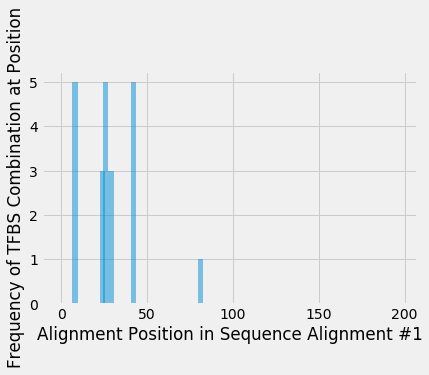

In [70]:
pos = list(position_to_count_dictionaries[0].keys())
y_pos = np.arange(len(pos))
freqs = list(position_to_count_dictionaries[0].values())
 
plt.bar(y_pos, freqs, align='center', alpha=0.5, width = 3)
plt.xlabel("Alignment Position in Sequence Alignment #1")
plt.ylabel("Frequency of TFBS Combination at Position")

In [71]:
# For convenience, here are dictionaries of IDs that map to a combination.

all_combo_ids = []

for g in group_by_combo_tables:
    combo_ids = {}
    for i in g.index.values:
        combo = g["Species with TFBS at Position"][i]
        combo_ids[i] = combo
    all_combo_ids.append(combo_ids)

In [72]:
def ID_dictionary(alignment, ID):
    """
    alignment: integer specifying which alignment to analyze
    ID: integer; ID linked to the unique TFBS combination
    """
    return all_combo_ids[alignment][ID]

In [73]:
# Example: from alignment 2, ID #11 represents this combination of species.
ID_dictionary(2, 11)

('MEMB002A', 'MEMB002B', 'MEMB002C', 'MEMB002D', 'MEMB004A', 'MEMB007B')

In [74]:
def frequent_patterns(alignment_num, percentile=0):
    """
    alignment_num: integer specifying which alignment to analyze
    percentile: (integer) limit frequencies to only above this percentile
    
    Returns:
    A table, like those in group_by_combo_tables, except w/only the largest counts
    """
    counts = list(counts_at_positions_tables[alignment_num]["Count"])
    table = group_by_combo_tables[alignment_num]
    return table[table["Count"] >= np.percentile(counts, percentile)]

frequent_patterns(7)

,Species with TFBS at Position,Count
0,"(MEMB002A, MEMB002C, MEMB003B, MEMB003C, MEMB0...",1
1,"(MEMB002A, MEMB002B, MEMB002C, MEMB002F, MEMB0...",1
2,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",1
3,"(MEMB002A, MEMB002C, MEMB002E, MEMB003F)",1
4,"(MEMB002A, MEMB002C, MEMB003C, MEMB005D, MEMB0...",1
5,"(MEMB002A, MEMB002C, MEMB002D, MEMB002E, MEMB0...",1
6,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",1
7,"(MEMB002A, MEMB002C, MEMB002F, MEMB003C, MEMB0...",1
8,"(MEMB002A, MEMB002C, MEMB003C)",2
9,"(MEMB002A, MEMB002C, MEMB002D, MEMB002E, MEMB0...",1


In [75]:
def most_frequent_pattern(alignment_num):
    """
    alignment_num: integer specifying which alignment to analyze
    
    Returns:
    A single-row table with the TFBS combo with the LARGEST count in the sequence
    """
    max_count = max(list(counts_at_positions_tables[alignment_num]["Count"]))
    table = group_by_combo_tables[alignment_num]
    return table[table["Count"] == max_count]

most_frequent_pattern(1) # <- In the second alignment, the most frequent combo occurs 52 times.

,Species with TFBS at Position,Count
0,"(MEMB002A, MEMB002B, MEMB002C, MEMB002D, MEMB0...",17


In [76]:
freq_tables = []
for i in range(len(tables)): # len(tables) represents the alignments
    t = frequent_patterns(i)
    t["Alignment File"] = [i] * t.count()[0]
    freq_tables.append(t)

frequent_all_alignments = pd.concat(freq_tables).sort_values(by=['Count'], ascending=False)


In [77]:
frequent_all_alignments.head()

,Species with TFBS at Position,Count,Alignment File
117,"(MEMB005D,)",138,34
123,"(dkik,)",86,256
119,"(MEMB007B,)",86,9
41,"(MEMB002F,)",82,196
8,"(MEMB002B,)",78,196


In [78]:
#### Get alignment file name and merge with frequent_all_alignments

align_file = []
for i in files[:200]:
     align_file.append(os.path.basename(i))

align_file_dict = {}
for i in range(200):
       align_file_dict[i] = align_file[i]

file_key =  pd.DataFrame.from_dict(align_file_dict, orient='index')
file_key = file_key.reset_index()
file_key.columns = ["Alignment File", "Alignment File Name"]

file_key['Alignment File Name'] = file_key['Alignment File Name'].str.split('_').str[5]
file_key['Alignment File Name'] = file_key['Alignment File Name'].str.replace('.fa', '')

occurence = frequent_all_alignments.merge(file_key,  how='outer')

#occurance.shape # 61955
#frequent_all_alignments.shape # 61955

occurence.head()


,Species with TFBS at Position,Count,Alignment File,Alignment File Name
0,"(MEMB005D,)",138,34,VT56450
1,"(MEMB002F,)",26,34,VT56450
2,"(MEMB002B, MEMB004A)",25,34,VT56450
3,"(MEMB003B,)",25,34,VT56450
4,"(MEMB003F,)",22,34,VT56450


In [80]:
occurence.to_csv('~/Desktop/occurance_zelda.csv')